<a href="https://colab.research.google.com/github/ncontinanza/30-days-of-code/blob/master/Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import base64

token = base64.b64decode("Njk4ZGVjMWE5Y2YyNDQ5ZmNhY2FkOWU4NDdjMDk5NWU1NTZhMDk5Yw====").decode("utf-8")

! rm -rf tp-datos-2c2020 datos
! git clone https://{token}@github.com/AlexDaciuk/tp-datos-2c2020.git
! mv tp-datos-2c2020 datos

from datos.preproc import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
from sklearn.tree import plot_tree
import pandas as pd

Cloning into 'tp-datos-2c2020'...
remote: Enumerating objects: 172, done.
remote: Counting objects: 100% (172/172), done.
remote: Compressing objects: 100% (134/134), done.
remote: Total 407 (delta 77), reused 107 (delta 38), pack-reused 235
Receiving objects: 100% (407/407), 9.79 MiB | 21.90 MiB/s, done.
Resolving deltas: 100% (205/205), done.


In [9]:
df_all = preprocessing.get_data()

# **Árbol de decisión**

In [10]:
df_tree = preprocessing.tree_preproc(df_all)

In [11]:
# Separate test and train data
X_train, X_test, y_train, y_test = train_test_split(df_tree.drop('volveria', 1), df_tree['volveria'])

{'criterion': 'entropy', 'max_depth': 5, 'max_features': 'auto', 'splitter': 'best'}
El score general del modelo es 0.845307917888563
La media del cross validation score con k=10 es 0.8484136310223267
El accuracy del modelo es 0.8208955223880597
La precision del modelo es 0.8596491228070176
El recall del modelo es 0.6363636363636364
El f1 del modelo es 0.7313432835820897


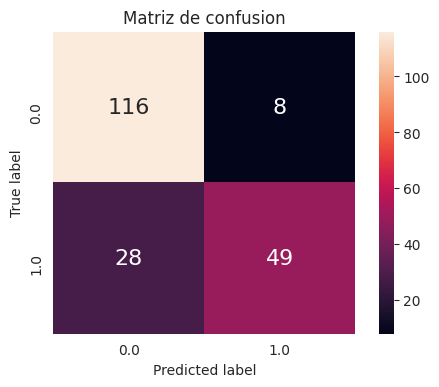

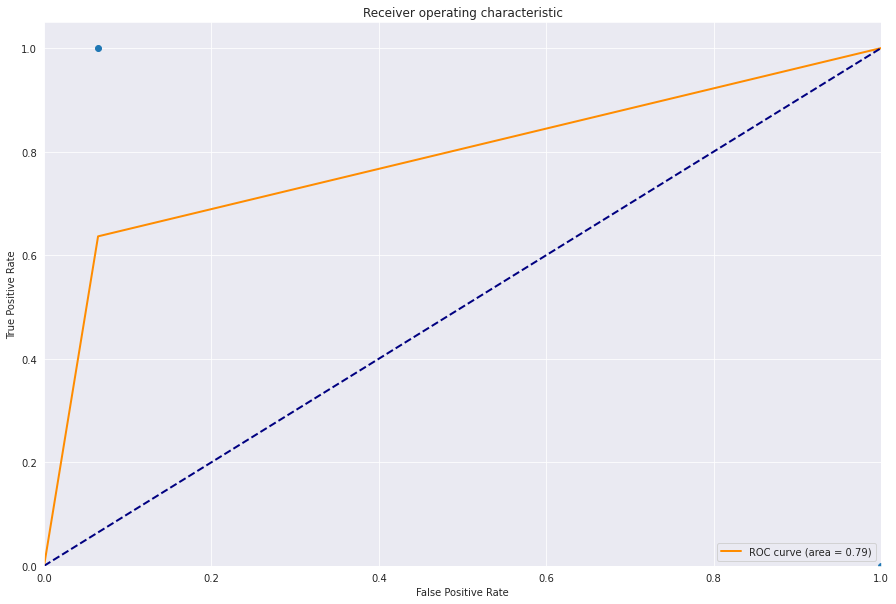

In [12]:
parameters = {'max_depth': range(3,10), 'criterion': ('gini', 'entropy'), 'splitter': ("best", "random"), 'max_features' : ("auto", "sqrt", "log2")}
gscv = GridSearchCV(DecisionTreeClassifier(), parameters, scoring='roc_auc')

gscv.fit(X_train, y_train)
print(gscv.best_params_)

preprocessing.report(gscv, X_train, y_train, X_test, y_test)